# 키워드 정리
## 회귀
임의의 수치를 예측하는 문제입니다. 따라서 타깃값도 임의의 수치가 됩니다.

## k-최근접 이웃 회귀
k-최근접 이웃 알고리즘을 사용해 회귀 문제를 풉니다.
가장 가까운 이웃 샘플을 찾고 이 샘플의 타깃값을 평균하여 예측으로 삼습니다.
결정계수(R^2)

대표적인 회귀 문제의 성능 측정 도구입니다.
1에 가까울수록 좋고, 0에 가깝다면 성능이 나쁜 모델입니다.

## 과대적합

모델의 훈련 세트 성능이 테스트 세트 성능보다 훨씬 높을 때 일어납니다.
모델이 훈련 세트에 너무 집착해서 데이터에 내재된 거시적인 패턴을 감지하지 못합니다.
## 과소적합

훈련 세트와 테스트 세트의 성능이 모두 동일하게 낮거나 테스트 세트 성능이 오히려 더 높을 때 일어납니다.
이런 경우 더 복잡한 모델을 사용해 훈련 세트에 잘 맞는 모델을 만들어야 합니다.

In [2]:
import numpy as np

# 농어의 길이
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
     
# 농어의 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

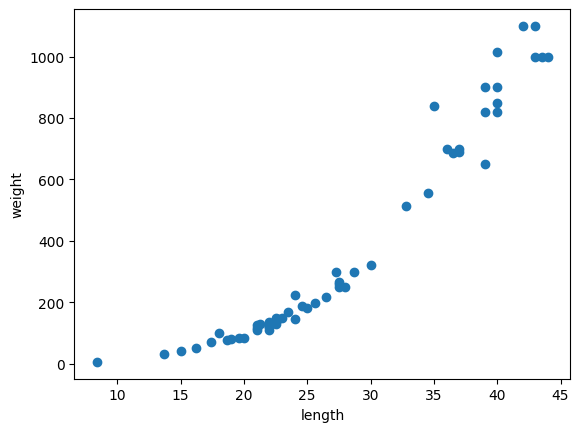

In [3]:
# 경향성 파악
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
data = perch_length.reshape(-1, 1)  # (-1, 1) => (56, 1) : 56개(모든 데이터 개수) 행의 2차원 배열
data

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, perch_weight, test_size=0.2, random_state=42
)

In [9]:
print(train_input.shape)
print(test_input.shape)

print(train_target.shape, test_target.shape)

# 특성이 1개(길이)라서, 정규화는 필요 없다

(44, 1)
(12, 1)
(44,) (12,)


In [10]:
from sklearn.neighbors import KNeighborsRegressor  # 회기

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [11]:
print("훈련세트 score:", knr.score(train_input, train_target))
print("테스트 세트 score:", knr.score(test_input, test_target))

훈련세트 score: 0.9699886106745992
테스트 세트 score: 0.9932626838364674


### 테스트 세트의 점수(결정계수)가 더 높다?
→ **과소 적합 상태** - 학습을 더 시키거나, 모델의 복잡도를 증가시켜야 함

In [12]:
knr = KNeighborsRegressor(n_neighbors=3)
# knr.n_neighbors = 3

knr.fit(train_input, train_target)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
print("훈련세트 score:", knr.score(train_input, train_target))
print("테스트 세트 score:", knr.score(test_input, test_target))

훈련세트 score: 0.9803764248982696
테스트 세트 score: 0.9761346952012298


In [15]:
knr.predict([[38]])  # 38cm 농어의 무게는?

array([720.])

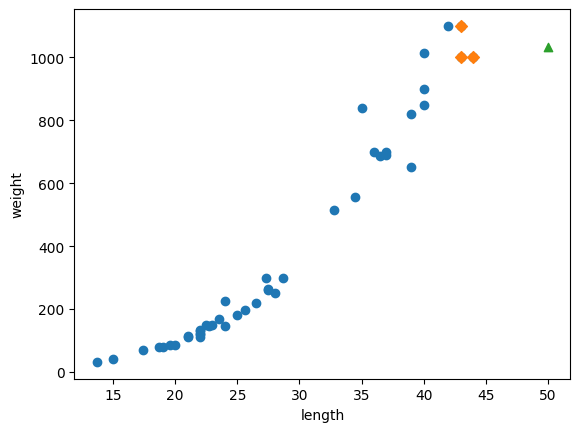

In [21]:
# 근처에 있는 데이터부터 파악
_, indexes = knr.kneighbors([[50]])

# 경향성 파악
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes][0], train_target[indexes][0], marker='D')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
print(train_target[indexes])
print(np.mean(train_target[indexes]))

[[1000. 1100. 1000.]]
1033.3333333333333


[[1000. 1100. 1000.]]
1033.3333333333333


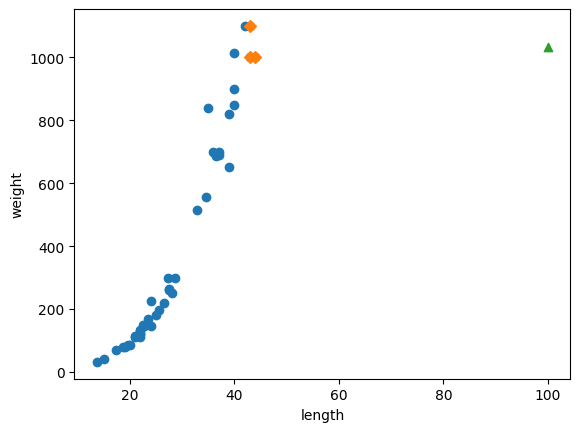

In [25]:
# 근처에 있는 데이터부터 파악
_, indexes = knr.kneighbors([[100]])

# 경향성 파악
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes][0], train_target[indexes][0], marker='D')
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

print(train_target[indexes])
print(np.mean(train_target[indexes]))

### k최근접 이웃의 한계?
- 농어의 길이값을 아무리 늘려도 무게가 늘어나지 않는다.
- 근처에 있는 데이터, 즉 가장 긴 길이의 데이터들의 평균 값을 구해주기 때문.

→ 선형 회귀가 필요해 보인다 (다음에...)